# Test 3: MNT de la region BeniMellal-Khenifra

# Study case 3:

In [1]:
# IMPORTING LIBRARIES
import numpy as np
import matplotlib.pyplot as plt
import rasterio
from LNC import get_dln, f_lnd, fdln

In [2]:
# Load DEM
dem = rasterio.open('tifs/demBK.tif')

# Load aspect (slope)
asp = rasterio.open('tifs/demBK_aspect.tif')

In [3]:
print("\nDEM\n")
print(dem.profile)
print("\nASPECT\n")
print(asp.profile)


DEM

{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9999.0, 'width': 251, 'height': 258, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.008333333330677291, 0.0, -7.333333333,
       0.0, -0.008333333333333328, 33.483333333), 'tiled': False, 'interleave': 'band'}

ASPECT

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -9999.0, 'width': 251, 'height': 258, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.00833333333333, 0.0, -7.333333333338395,
       0.0, -0.008333333333329996, 33.483333333335935), 'tiled': False, 'interleave': 'band'}


In [4]:
# reading the first band (not from zero!)
band1 = dem.read(1)

In [5]:
# Preview of the 
band1

array([[-9999, -9999, -9999, ..., -9999, -9999, -9999],
       [-9999, -9999, -9999, ..., -9999, -9999, -9999],
       [-9999, -9999, -9999, ..., -9999, -9999, -9999],
       ...,
       [-9999, -9999, -9999, ..., -9999, -9999, -9999],
       [-9999, -9999, -9999, ..., -9999, -9999, -9999],
       [-9999, -9999, -9999, ..., -9999, -9999, -9999]], dtype=int16)

In [6]:
band1 = band1.flatten()

In [7]:
f1 = get_dln(band1)

In [8]:
n = sum(f1)
ff1 = []
for i in range(len(f1)):
    ff1.append(100*f1[i]/n)


In [9]:
f_lnd(f1)

digit | frequency
    1 |  35.95
    2 |  12.61
    3 |   4.75
    4 |   8.35
    5 |   6.34
    6 |   6.89
    7 |   9.80
    8 |   8.65
    9 |   6.65


In [10]:
# reading the first band (not from zero!)
band2 = asp.read(1) # 2d array

In [11]:
band2 = band2.flatten()

In [12]:
f2 = get_dln(band2)

In [13]:
n2 = sum(f2)
ff2 = []
for i in range(len(f2)):
    ff2.append(100*f2[i]/n2)


In [14]:
f_lnd(f2)

digit | frequency
    1 |  31.39
    2 |  30.49
    3 |  27.37
    4 |   2.08
    5 |   1.81
    6 |   1.66
    7 |   1.72
    8 |   1.64
    9 |   1.84


In [15]:
X = list(range(1,  10))

B = [30.1, 17.6, 12.5, 9.7, 7.9, 6.7, 5.8, 5.1, 4.6]

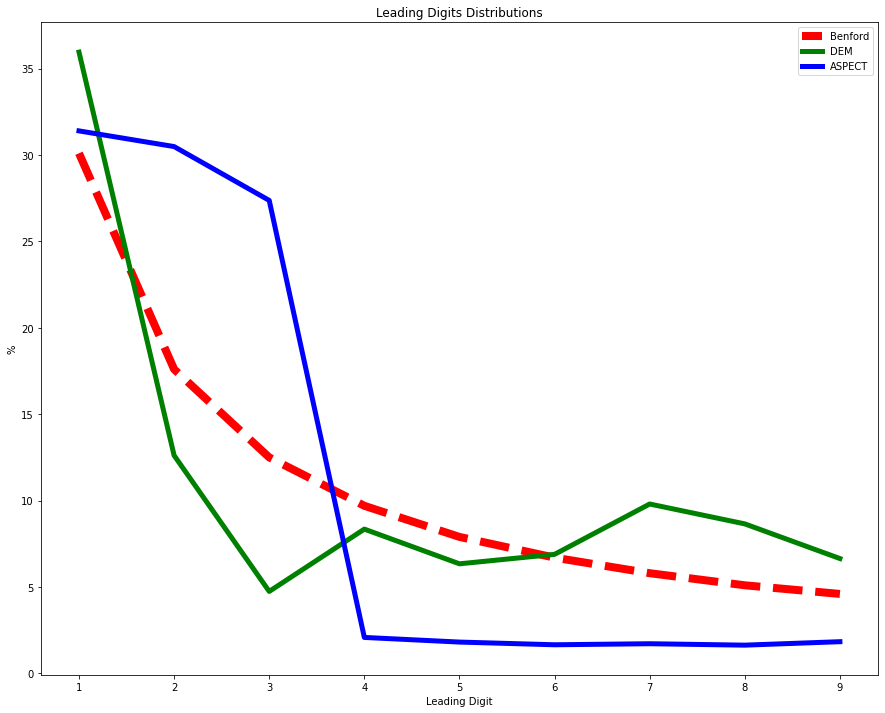

In [25]:
# Plotting both the curves simultaneously
plt.figure(figsize=(15, 12))
plt.plot(X, B, '--', color='r', label='Benford', linewidth=8)
plt.plot(X, ff1, color='g', label='DEM', linewidth=5)
plt.plot(X, ff2, color='b', label='ASPECT', linewidth=5)
  
# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Leading Digit")
plt.ylabel("%")
plt.title("Leading Digits Distributions")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend()
  
# To load the display window
plt.show()

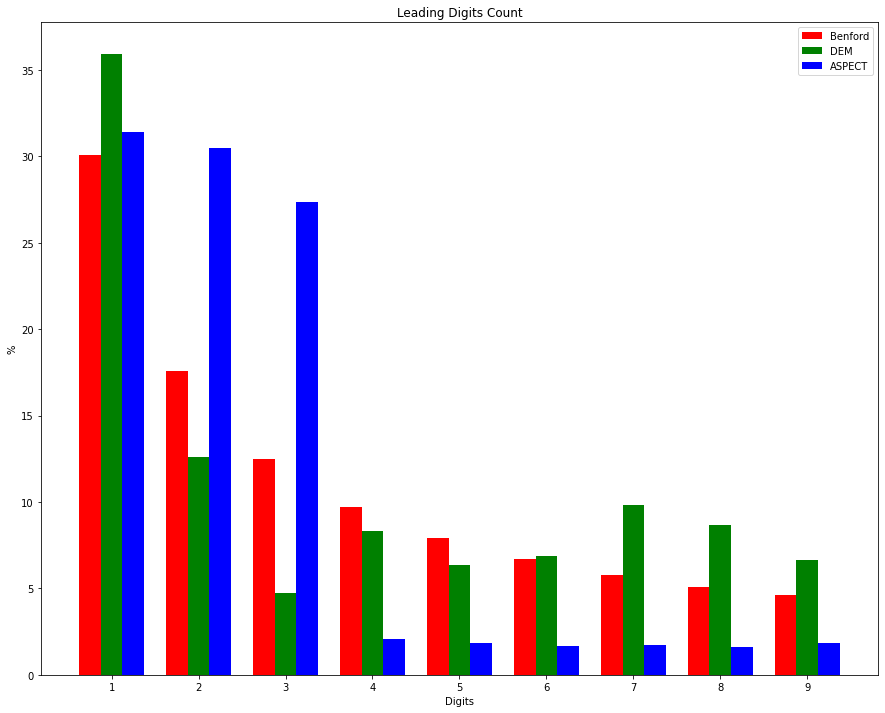

In [17]:
N = 9
ind = np.arange(N) 
width = 0.25

plt.figure(figsize=(15, 12))

bar1 = plt.bar(ind, B, width, color = 'r')

bar2 = plt.bar(ind+width, ff1, width, color='g')
  
bar3 = plt.bar(ind+width*2, ff2, width, color = 'b')
  
plt.xlabel("Digits")
plt.ylabel('%')
plt.title("Leading Digits Count")
  
plt.xticks(ind+width,['1', '2', '3', '4', '5', '6', '7', '8', '9'])
plt.legend( (bar1, bar2, bar3), ('Benford', 'DEM', 'ASPECT') )
plt.show()